# MNIST Palyground - Supervised classification  

Use different classification methods on the MNIST 784 dataset. Multiclass classification of handwritten digtis between 0  and 9.

In [1]:
from collections import Counter

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

from sklearn.dummy import DummyClassifier

Set `random_state` to be used thoughout this notebook.

In [2]:
random_state = 842

## Fetch and prepare the MNIST 784 dataset  
Fetch the MNIST 784 dataset from OpenML Datasets (https://www.openml.org/) using the `fetch_openml` function provided by sklearn. Extract the data and the class labels from the dataset and do some basic checks.

In [3]:
X, y = fetch_openml(name='mnist_784', return_X_y=True, as_frame=False, parser='auto')
print(f"Data shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"All targets: {np.unique(y)}")

Data shape: (70000, 784)
Target shape: (70000,)
All targets: ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


In [4]:
X = X / 255.0

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

Check the balance of the classes. Ideally the classes should be roughly balanced without any dominant classes.

In [ ]:
def check_classes_imb(cls_count):
  cls_list = [(k, cls_count[k]) for k in sorted(cls_count.keys())]
  return cls_list

cls_count_train = check_classes_imb(Counter(y_train))
cls_count_test = check_classes_imb(Counter(y_test))

print(f"Training classes:\n {cls_count_train}")
print(f"Test classes:\n {cls_count_test}")

Training classes:
 [('0', 5516), ('1', 6333), ('2', 5595), ('3', 5627), ('4', 5476), ('5', 5049), ('6', 5506), ('7', 5857), ('8', 5469), ('9', 5572)]
Test classes:
 [('0', 1387), ('1', 1544), ('2', 1395), ('3', 1514), ('4', 1348), ('5', 1264), ('6', 1370), ('7', 1436), ('8', 1356), ('9', 1386)]


## Dummy Classification  

Build a dummy classifier to check what a uniform random selection would predict. This acts as a baseline. Every non-dummy classifier should perform (much) better than this dummy classifier.

In [ ]:
def dummy_classification(X_train, X_test, y_train, y_test):
  dummy_clf = DummyClassifier(strategy='uniform', random_state=random_state)
  dummy_clf.fit(X_train, y_train)
  y_hat = dummy_clf.predict(X_test)

  accuracy = accuracy_score(y_hat, y_test, )
  f1 = f1_score(y_hat, y_test, average='weighted')

  return (accuracy, f1)

Dummy classification base on the train-test split. If the classes are roughly balanced an accuracy of ~0.1 would be expected.

In [ ]:
dummy_cls = dummy_classification(X_train, X_test, y_train, y_test)
print(f"Dummy accuracy: {dummy_cls[0]:3.4f}")
print(f"Dummy F1 score: {dummy_cls[1]:3.4f}")

Dummy accuracy: 0.0956
Dummy F1 score: 0.0955


In [ ]:
# LogisticRegression
# SGDClassifier
# KNeighborsClassifier
# SVC (Support Vector Classifier)
# RandomForestClassifier
# GradientBoostingClassifier (?)
# AdaBoostClassifier
# XGBoost, LightGBM (?)
# probably sklearn.multicalss could be needed

# CNN built using pytorch maybe own notebook

## Logistic Regression Classifier

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lrc_pipe = make_pipeline(MaxAbsScaler(), LogisticRegression(max_iter=1000, C=0.5, random_state=random_state))
lrc_pipe.fit(X_train, y_train)

print(f"Class labels: {lrc_pipe.classes_}")
print(f"No. of features seen during fit: {lrc_pipe.n_features_in_}")

y_hat_train = lrc_pipe.predict(X_train)
accuracy = accuracy_score(y_hat_train, y_train)
f1 = f1_score(y_hat_train, y_train, average='weighted')

print('\nTraining data:')
print(f"LogisticRegression train accuracy: {accuracy:3.4f}")
print(f"LogisticRegression train F1 score: {f1:3.4f}")

y_hat_test = lrc_pipe.predict(X_test)
accuracy = accuracy_score(y_hat_test, y_test)
f1 = f1_score(y_hat_test, y_test, average='weighted')

print('\nTest data:')
print(f"LogisticRegression test accuracy: {accuracy:3.4f}")
print(f"LogisticRegression test F1 score: {f1:3.4f}")

Class labels: ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']
No. of features seen during fit: 784

Training data:
LogisticRegression train accuracy: 0.9383
LogisticRegression train F1 score: 0.9384

Test data:
LogisticRegression test accuracy: 0.9209
LogisticRegression test F1 score: 0.9210


### K-Fold Cross Validation

In [ ]:
n_splits = 5
acc_train_list = list()
f1_train_list = list()
acc_test_list = list()
f1_test_list = list()

kfold = KFold(n_splits=n_splits)
for train_idx, test_idx in kfold.split(X):
  lrc_pipe = make_pipeline(MaxAbsScaler(), LogisticRegression(max_iter=1000, C=0.5, random_state=random_state))
  lrc_pipe.fit(X[train_idx], y[train_idx])

  y_hat_train = lrc_pipe.predict(X[train_idx])
  acc_train_list.append(accuracy_score(y_hat_train, y[train_idx]))
  f1_train_list.append(f1_score(y_hat_train, y[train_idx], average='weighted'))

  y_hat_test = lrc_pipe.predict(X[test_idx])
  acc_test_list.append(accuracy_score(y_hat_test, y[test_idx]))
  f1_test_list.append(f1_score(y_hat_test, y[test_idx], average='weighted'))

Plot the results of the 5-fold cross validation. Include accuracy and F1 score in the plot.

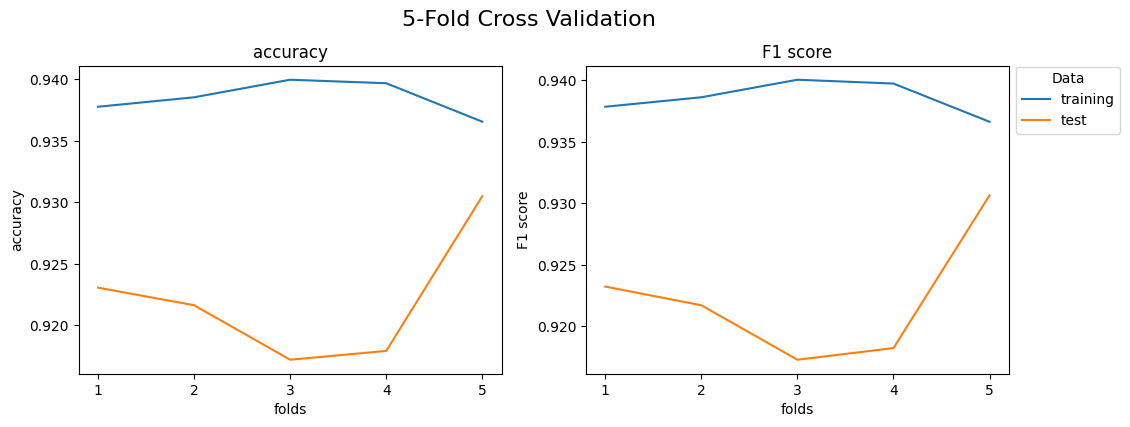

In [ ]:
folds = np.arange(1, 6)
fig, axs = plt.subplots(1, 2, figsize=(12, 4), sharex=True)
axs[0].plot(folds, acc_train_list, color='tab:blue', label='training')
axs[0].plot(folds, acc_test_list, color='tab:orange', label='test')
axs[0].set_ylabel('accuracy')
axs[0].set_title('accuracy')
axs[0].set_xlabel('folds')
axs[1].plot(folds, f1_train_list, color='tab:blue', label='training')
axs[1].plot(folds, f1_test_list, color='tab:orange', label='test')
axs[1].set_ylabel('F1 score')
axs[1].set_title('F1 score')
axs[1].set_xlabel('folds')
plt.xticks(folds)
fig.suptitle(f"{n_splits}-Fold Cross Validation", ha='center', fontsize=16, y=1.02)
axs[1].legend(bbox_to_anchor=(1.28, 1.02), loc='upper right', title='Data')
plt.show()

### Evaluate Regularization Strength  
Train models on different values of `C` and plot the results for accuracy and F1 score.

In [ ]:
c_vals = np.logspace(-2, 1, num=10)
acc_train_list = list()
f1_train_list = list()
acc_test_list = list()
f1_test_list = list()

for c_val in c_vals:
  lrc_pipe = make_pipeline(MaxAbsScaler(), LogisticRegression(max_iter=10000, C=c_val, random_state=random_state))
  lrc_pipe.fit(X_train, y_train)

  y_hat_train = lrc_pipe.predict(X_train)
  acc_train_list.append(accuracy_score(y_hat_train, y_train))
  f1_train_list.append(f1_score(y_hat_train, y_train, average='weighted'))

  y_hat_test = lrc_pipe.predict(X_test)
  acc_test_list.append(accuracy_score(y_hat_test, y_test))
  f1_test_list.append(f1_score(y_hat_test, y_test, average='weighted'))

Plot the results of the regularization strength evaluation. Include accuracy and F1 score in the plot.

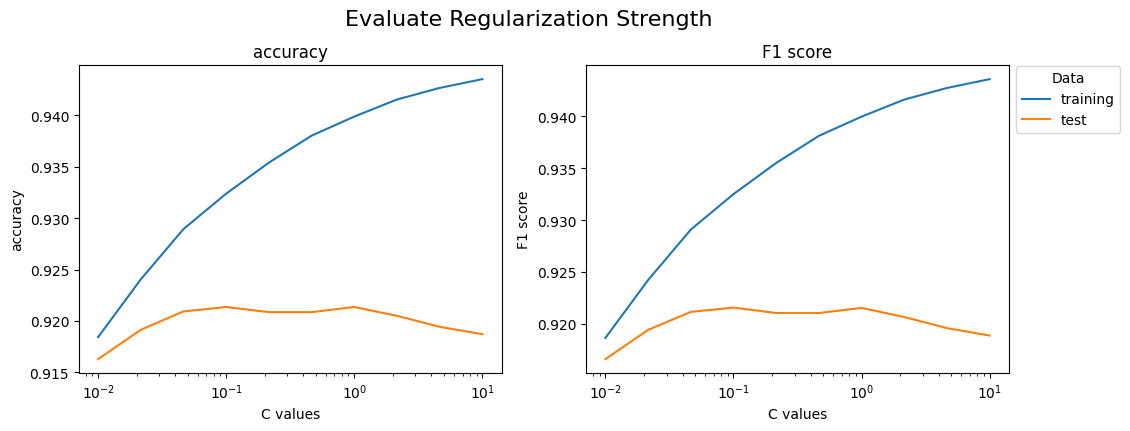

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4), sharex=True)
axs[0].plot(c_vals, acc_train_list, color='tab:blue', label='training')
axs[0].plot(c_vals, acc_test_list, color='tab:orange', label='test')
axs[0].set_ylabel('accuracy')
axs[0].set_title('accuracy')
axs[0].set_xlabel('C values')
axs[1].plot(c_vals, f1_train_list, color='tab:blue', label='training')
axs[1].plot(c_vals, f1_test_list, color='tab:orange', label='test')
axs[1].set_ylabel('F1 score')
axs[1].set_title('F1 score')
axs[1].set_xlabel('C values')
plt.xticks(c_vals)
plt.xscale('log')
fig.suptitle('Evaluate Regularization Strength', ha='center', fontsize=16, y=1.02)
axs[1].legend(bbox_to_anchor=(1.28, 1.02), loc='upper right', title='Data')
plt.show()

## Support Vector Classifier

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc_pipe = make_pipeline(MaxAbsScaler(), SVC(C=0.5, random_state=random_state))
svc_pipe.fit(X_train, y_train)

print(f"Class labels: {svc_pipe.classes_}")
print(f"No. of features seen during fit: {svc_pipe.n_features_in_}")

y_hat_train = svc_pipe.predict(X_train)
accuracy = accuracy_score(y_hat_train, y_train)
f1 = f1_score(y_hat_train, y_train, average='weighted')

print('\nTraining data:')
print(f"SVC train accuracy: {accuracy:3.4f}")
print(f"SVC train F1 score: {f1:3.4f}")

y_hat_test = svc_pipe.predict(X_test)
accuracy = accuracy_score(y_hat_test, y_test)
f1 = f1_score(y_hat_test, y_test, average='weighted')

print('\nTest data:')
print(f"SVC test accuracy: {accuracy:3.4f}")
print(f"SVC test F1 score: {f1:3.4f}")

Class labels: ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']
No. of features seen during fit: 784

Training data:
SVC train accuracy: 0.9827
SVC train F1 score: 0.9827

Test data:
SVC test accuracy: 0.9750
SVC test F1 score: 0.9750


## K-Nearest Neighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
n_neighbors = 5
knn_pipe = make_pipeline(MaxAbsScaler(), KNeighborsClassifier(n_neighbors=n_neighbors))
knn_pipe.fit(X_train, y_train)

print(f"Class labels: {knn_pipe.classes_}")
print(f"No. of features seen during fit: {knn_pipe.n_features_in_}")

y_hat_train = knn_pipe.predict(X_train)
accuracy = accuracy_score(y_hat_train, y_train)
f1 = f1_score(y_hat_train, y_train, average='weighted')

print('\nTraining data:')
print(f"KNN train accuracy: {accuracy:3.4f}")
print(f"KNN train F1 score: {f1:3.4f}")

y_hat_test = knn_pipe.predict(X_test)
accuracy = accuracy_score(y_hat_test, y_test)
f1 = f1_score(y_hat_test, y_test, average='weighted')

print('\nTest data:')
print(f"KNN test accuracy: {accuracy:3.4f}")
print(f"KNN test F1 score: {f1:3.4f}")

Class labels: ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']
No. of features seen during fit: 784

Training data:
KNN train accuracy: 0.9808
KNN train F1 score: 0.9808

Test data:
KNN test accuracy: 0.9709
KNN test F1 score: 0.9710


## Gradient Boosting Classifier  
Using histogram-based gradient boosting classification.

In [6]:
from sklearn.ensemble import HistGradientBoostingClassifier

In [7]:
n_estimators = 500

gbc_pipe = make_pipeline(MaxAbsScaler(), HistGradientBoostingClassifier(random_state=random_state))
gbc_pipe.fit(X_train, y_train)

print(f"Class labels: {gbc_pipe.classes_}")
print(f"No. of features seen during fit: {gbc_pipe.n_features_in_}")

y_hat_train = gbc_pipe.predict(X_train)
accuracy = accuracy_score(y_hat_train, y_train)
f1 = f1_score(y_hat_train, y_train, average='weighted')

print('\nTraining data:')
print(f"GBC train accuracy: {accuracy:3.4f}")
print(f"GBC train F1 score: {f1:3.4f}")

y_hat_test = gbc_pipe.predict(X_test)
accuracy = accuracy_score(y_hat_test, y_test)
f1 = f1_score(y_hat_test, y_test, average='weighted')

print('\nTest data:')
print(f"GBC test accuracy: {accuracy:3.4f}")
print(f"GBC test F1 score: {f1:3.4f}")

Class labels: ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']
No. of features seen during fit: 784

Training data:
GBC train accuracy: 0.9976
GBC train F1 score: 0.9976

Test data:
GBC test accuracy: 0.9769
GBC test F1 score: 0.9769


## Random Forest Classifier

In [9]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
n_estimators = 250
max_depth = 16
min_samples_leaf = 24

rfc_pipe = make_pipeline(MaxAbsScaler(), RandomForestClassifier(n_estimators=n_estimators,
                                                                max_depth=max_depth,
                                                                min_samples_leaf=min_samples_leaf,
                                                                random_state=random_state))
rfc_pipe.fit(X_train, y_train)

print(f"Class labels: {rfc_pipe.classes_}")
print(f"No. of features seen during fit: {rfc_pipe.n_features_in_}")

y_hat_train = rfc_pipe.predict(X_train)
accuracy = accuracy_score(y_hat_train, y_train)
f1 = f1_score(y_hat_train, y_train, average='weighted')

print('\nTraining data:')
print(f"GBC train accuracy: {accuracy:3.4f}")
print(f"GBC train F1 score: {f1:3.4f}")

y_hat_test = rfc_pipe.predict(X_test)
accuracy = accuracy_score(y_hat_test, y_test)
f1 = f1_score(y_hat_test, y_test, average='weighted')

print('\nTest data:')
print(f"GBC test accuracy: {accuracy:3.4f}")
print(f"GBC test F1 score: {f1:3.4f}")

Class labels: ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']
No. of features seen during fit: 784

Training data:
GBC train accuracy: 0.9620
GBC train F1 score: 0.9620

Test data:
GBC test accuracy: 0.9491
GBC test F1 score: 0.9492
